In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
ROCK, PAPER, SCISSORS = 0, 1, 2
NUM_ACTIONS = 3

In [4]:
def normalize(value):
    normalizing_sum = np.sum(value)
    if normalizing_sum > 0:
        return value / normalizing_sum
    return np.ones(value.shape[0])/value.shape[0]

def get_strategy(regret_sum):
    return normalize(np.maximum(regret_sum, 0))

def get_action(strategy):
    strategy = strategy / np.sum(strategy)
    return np.searchsorted(np.cumsum(strategy), random.random())

def get_utility(opponent_action):
    action_utility = np.zeros(NUM_ACTIONS)
    action_utility[opponent_action] = 0
    action_utility[(opponent_action + 1) % NUM_ACTIONS] = 1
    action_utility[(opponent_action - 1) % NUM_ACTIONS] = -1
    return action_utility

In [5]:
def inner_train(regret_sum, strategy_sum, opponent_strategy):
    # accumulate the current strategy based on regret
    strategy = get_strategy(regret_sum)
    strategy_sum += strategy

    # select my action and opponent action
    my_action = get_action(strategy)
    opponent_action = get_action(opponent_strategy)
    
    action_utility = get_utility(opponent_action)

    regret_sum += action_utility - action_utility[my_action]
    return regret_sum, strategy_sum


def train(iterations):
    regret_sum = np.zeros(NUM_ACTIONS)
    strategy_sum = np.zeros(NUM_ACTIONS)
    opponent_strategy = np.array([0.4, 0.3, 0.3])
    
    for _ in range(iterations):
        regret_sum, strategy_sum = inner_train(regret_sum, strategy_sum, opponent_strategy)
    return strategy_sum

def train_2_players(outer_iterations, iterations):
    strategy_sum_p1 = np.zeros(NUM_ACTIONS)
    strategy_sum_p2 = np.zeros(NUM_ACTIONS)

    for _ in range(outer_iterations):
        opponent_strategy = normalize(strategy_sum_p2)
        regret_sum_p1 = np.zeros(NUM_ACTIONS)
        for i in range(iterations):
            # train p1
            regret_sum_p1, strategy_sum_p1 = inner_train(regret_sum_p1, strategy_sum_p1, opponent_strategy)

        opponent_strategy = normalize(strategy_sum_p1)
        regret_sum_p2 = np.zeros(NUM_ACTIONS)
        for i in range(iterations):
            # train p2
            regret_sum_p2, strategy_sum_p2 = inner_train(regret_sum_p2, strategy_sum_p2, opponent_strategy)

        print(normalize(strategy_sum_p1), normalize(strategy_sum_p2))
    return strategy_sum_p1, strategy_sum_p2


In [6]:
strategy_sum = train(100000)
normalize(strategy_sum)

array([1.91152409e-03, 9.97947169e-01, 1.41306804e-04])

In [11]:
s1, s2 = train_2_players(15, 1000)
normalize(s1), normalize(s2)

[0.03143798 0.44717767 0.52138435] [1.91413059e-02 3.33333333e-04 9.80525361e-01]
[0.51538566 0.2237555  0.26085884] [0.01056232 0.49875833 0.49067935]
[0.34370155 0.14928144 0.50701701] [0.33584354 0.33670357 0.3274529 ]
[0.26143331 0.34575573 0.39281097] [0.49477216 0.25454515 0.25068268]
[0.20960442 0.47448123 0.31591435] [0.3958844  0.20370279 0.40041281]
[0.33891075 0.3977347  0.26335455] [0.33092726 0.26320442 0.40586832]
[0.43183541 0.34233688 0.22582771] [0.28374717 0.36831807 0.34793475]
[0.39939233 0.3157323  0.28487537] [0.24872669 0.44668456 0.30458874]
[0.35558207 0.28640244 0.35801549] [0.33175706 0.39742332 0.27081962]
[0.32513568 0.30118058 0.37368374] [0.39703621 0.35860934 0.24435445]
[0.29572941 0.36397477 0.34029582] [0.36524676 0.32860778 0.30614547]
[0.27115473 0.41565366 0.31319161] [0.33483731 0.30127935 0.36388334]
[0.29460491 0.4009486  0.30444649] [0.30910623 0.27881769 0.41207608]
[0.34371462 0.37239672 0.28388866] [0.29492311 0.30211377 0.40296312]
[0.38707

(array([0.38707015, 0.34791895, 0.2650109 ]),
 array([0.27660996, 0.34535585, 0.3780342 ]))

Mean score: -0.3 Median score: 0.0


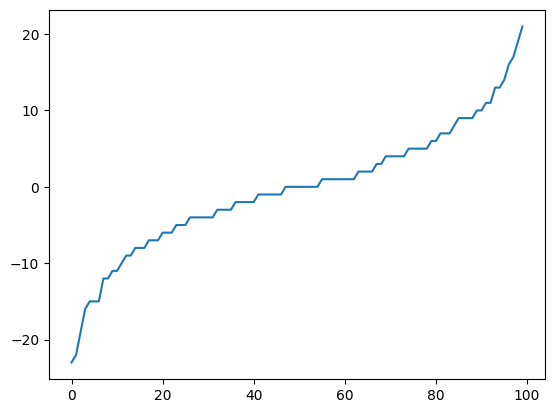

In [17]:
games = []

for j in range(100):
    game_scores = 0
    for i in range(100):
        action = get_action(s1)
        opponent_action = get_action(s2)
        game_scores += get_utility(action)[opponent_action]
    games.append(game_scores)

plt.plot(sorted(games))
print("Mean score:", np.mean(games), "Median score:", np.median(games))